# Kerry Back, Rice University, Original Source

<a target="_blank" href="https://colab.research.google.com/github/kerryback/mgmt638/blob/main/notebooks/11-backtest_sector.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Rice MBA candidate Ray Lee adds extension based on professor Kerry's handout


# Read data

- Penny stocks have been eliminated
- Data includes both large caps and small caps.  You can filter to small caps if you want.
- Filter to your sector.

In [1]:
from google.colab import drive
import sys
from joblib import load
import pandas as pd

drive.mount('/content/drive', force_remount=True)

folder_path = '/content/drive/MyDrive/MGMT767/merged_database_05172024.csv'
sys.path.append(folder_path)

Mounted at /content/drive


In [2]:
df = pd.read_csv(folder_path)
df.tail()

,index,ticker,date,marketcap,pb,ret,mom,volume,volatility,closeadj,closeunadj,roe,accruals,agr,sector,mktvol,ShortVolume,ShortExemptVolume,TotalVolume,relss
1132906,3169760,ZYXI,2024-04-19,383.1,8.3,-0.044500,0.051089,117266.8,0.065897,11.91,11.91,0.168182,-0.138665,0.038452,Healthcare,0.109365,26955.000000,1076.800000,44156.0,0.610449
1132907,3169761,ZYXI,2024-04-26,366.1,7.9,-0.014938,0.067726,133455.2,0.064197,11.38,11.38,0.168182,-0.138665,0.038452,Healthcare,0.106969,28044.400000,735.400000,40218.6,0.697299
1132908,3169762,ZYXI,2024-05-03,360.6,7.8,-0.018733,0.081294,136114.4,0.059843,11.21,11.21,0.163396,-0.194264,0.027482,Healthcare,0.123978,0.000000,0.000000,0.0,0.000000
1132909,3169763,ZYXI,2024-05-10,349.5,10.6,-0.046364,0.319104,166005.0,0.057570,11.00,11.00,0.163396,-0.194264,0.027482,Healthcare,0.141056,0.000000,0.000000,0.0,0.000000
1132910,3169764,ZYXI,2024-05-17,333.3,10.1,0.037178,0.249738,110905.4,0.058251,10.49,10.49,0.163396,-0.194264,0.027482,Healthcare,0.135276,11647.666667,1211.666667,23311.0,0.499664


In [3]:
#If Fama-French data is not updated yet, we will filter out the date
#df = df[df['date']< "2024-04-01"]

In [4]:
df.head()

,index,ticker,date,marketcap,pb,ret,mom,volume,volatility,closeadj,closeunadj,roe,accruals,agr,sector,mktvol,ShortVolume,ShortExemptVolume,TotalVolume,relss
0,448,A,2018-08-03,20387.3,4.4,-0.000301,0.036068,2404016.2,0.039497,63.068,65.75,0.051039,-0.171638,0.022993,Healthcare,0.080746,111753.0,204.666667,554732.666667,0.201454
1,449,A,2018-08-10,20678.5,4.5,0.008073,0.045275,2188012.4,0.038481,63.049,65.73,0.051039,-0.171638,0.022993,Healthcare,0.081379,146847.4,232.800000,477696.400000,0.307407
2,450,A,2018-08-17,21280.0,4.6,-0.024151,0.077906,2255599.2,0.036668,63.558,66.26,0.051039,-0.171638,0.022993,Healthcare,0.066923,303841.4,127.400000,988129.000000,0.307492
3,451,A,2018-08-24,21097.6,4.6,0.020412,0.051867,3553459.0,0.033677,62.023,64.66,0.051039,-0.171638,0.022993,Healthcare,0.079415,156824.0,33.600000,666870.800000,0.235164
4,452,A,2018-08-31,20627.3,4.5,0.023638,0.054737,2272034.6,0.033859,63.289,65.98,0.064328,-0.152186,0.002575,Healthcare,0.074956,125026.0,2.400000,425225.800000,0.294023


In [5]:
#Uncomment this section if we want to filter the marketcap
# uncomment and execute the following to filter to small caps
"""
df["rnk"] = df.groupby("date", group_keys=False).marketcap.rank(
    ascending=False,
    method="first"
)
df = df[(df.rnk>1000) & (df.rnk<=3000)]
df = df.drop(columns=["rnk"])
"""

'\ndf["rnk"] = df.groupby("date", group_keys=False).marketcap.rank(\n    ascending=False,\n    method="first"\n)\ndf = df[(df.rnk>1000) & (df.rnk<=3000)]\ndf = df.drop(columns=["rnk"])\n'

In [6]:
#Check the industry in our file
df[df.date == df.date.max()].groupby("sector").ticker.count()

sector
Basic Materials           190
Communication Services    142
Consumer Cyclical         388
Consumer Defensive        167
Energy                    170
Financial Services        625
Healthcare                889
Industrials               485
Real Estate               235
Technology                550
Utilities                  80
Name: ticker, dtype: int64

### Select a sector

In [7]:
#Select sector if we want to see certain industry
"""
sector = "Healthcare"
df = df[df.sector==sector]
"""

'\nsector = "Healthcare"\ndf = df[df.sector==sector]\n'

In [8]:
df.head()

,index,ticker,date,marketcap,pb,ret,mom,volume,volatility,closeadj,closeunadj,roe,accruals,agr,sector,mktvol,ShortVolume,ShortExemptVolume,TotalVolume,relss
0,448,A,2018-08-03,20387.3,4.4,-0.000301,0.036068,2404016.2,0.039497,63.068,65.75,0.051039,-0.171638,0.022993,Healthcare,0.080746,111753.0,204.666667,554732.666667,0.201454
1,449,A,2018-08-10,20678.5,4.5,0.008073,0.045275,2188012.4,0.038481,63.049,65.73,0.051039,-0.171638,0.022993,Healthcare,0.081379,146847.4,232.800000,477696.400000,0.307407
2,450,A,2018-08-17,21280.0,4.6,-0.024151,0.077906,2255599.2,0.036668,63.558,66.26,0.051039,-0.171638,0.022993,Healthcare,0.066923,303841.4,127.400000,988129.000000,0.307492
3,451,A,2018-08-24,21097.6,4.6,0.020412,0.051867,3553459.0,0.033677,62.023,64.66,0.051039,-0.171638,0.022993,Healthcare,0.079415,156824.0,33.600000,666870.800000,0.235164
4,452,A,2018-08-31,20627.3,4.5,0.023638,0.054737,2272034.6,0.033859,63.289,65.98,0.064328,-0.152186,0.002575,Healthcare,0.074956,125026.0,2.400000,425225.800000,0.294023


## Define model and target

- Current code uses max_depth=4 and n_estimators=200
- Two possible targets: return in excess of the median or rank of the return.
- Comment one of them out.

In [9]:
df["target"] = df.groupby("date", group_keys=False).ret.apply(
    lambda x: 100 * (x-x.median())
)

"""
# could use this instead

df["target"] = df.groupby("date", group_keys=False).ret.apply(
    lambda x: 100 * x.rank(pct=True)
)
"""

'\n# could use this instead\n\ndf["target"] = df.groupby("date", group_keys=False).ret.apply(\n    lambda x: 100 * x.rank(pct=True)\n)\n'

In [10]:
df.head()

,index,ticker,date,marketcap,pb,ret,mom,volume,volatility,closeadj,...,roe,accruals,agr,sector,mktvol,ShortVolume,ShortExemptVolume,TotalVolume,relss,target
0,448,A,2018-08-03,20387.3,4.4,-0.000301,0.036068,2404016.2,0.039497,63.068,...,0.051039,-0.171638,0.022993,Healthcare,0.080746,111753.0,204.666667,554732.666667,0.201454,-0.369621
1,449,A,2018-08-10,20678.5,4.5,0.008073,0.045275,2188012.4,0.038481,63.049,...,0.051039,-0.171638,0.022993,Healthcare,0.081379,146847.4,232.800000,477696.400000,0.307407,0.576828
2,450,A,2018-08-17,21280.0,4.6,-0.024151,0.077906,2255599.2,0.036668,63.558,...,0.051039,-0.171638,0.022993,Healthcare,0.066923,303841.4,127.400000,988129.000000,0.307492,-2.810992
3,451,A,2018-08-24,21097.6,4.6,0.020412,0.051867,3553459.0,0.033677,62.023,...,0.051039,-0.171638,0.022993,Healthcare,0.079415,156824.0,33.600000,666870.800000,0.235164,1.076102
4,452,A,2018-08-31,20627.3,4.5,0.023638,0.054737,2272034.6,0.033859,63.289,...,0.064328,-0.152186,0.002575,Healthcare,0.074956,125026.0,2.400000,425225.800000,0.294023,2.049839


## Define predictors (features)

- Leaving out interactions with market volatility, because they didn't seem to make much difference.

In [11]:
features = [
    "marketcap",
    "pb",
    "mom",
    "volume",
    "volatility",
    "roe",
    "accruals",
    "agr",
    "relss"
]
features.sort()

## Define training dates and training windows

- Start training once we have three years of data.
- Specify num_years_for_training $\ge 3$ as the number of years of past data to train on in each iteration of the backtesting loop.

In [12]:
num_years_for_training = 3

In [13]:
for x in features:
  df[x+"_vol"] = df[x]*df.mktvol

features += [x+"_vol" for x in features]

In [14]:
dates = list(df.date.unique())
dates.sort()
train_dates = dates[156::52]  # once per year starting after three years

past_dates = {}               # dates on which to train for each training date
future_dates = {}             # dates for which to predict for each training date
for date in train_dates:
    start_index = dates.index(date) - 52*num_years_for_training
    start_index = start_index if start_index >= 0 else 0
    past_dates[date] = dates[start_index:dates.index(date)]
    if date < train_dates[-1]:
        future_dates[date] = dates[dates.index(date):(dates.index(date)+52)]
    else:
        future_dates[date] = dates[dates.index(date):]

# Choose the AI Algorithm to train AI Model

Four algorithms for training - XGBoost, Random Forest, Neural Network, and Long Short Term Memory.
These four algorithms can provide importance of features

## Run the loop for XGBoost

In [259]:
import xgboost as xgb
boost = xgb.XGBRegressor(
    max_depth=4,           # Maximum depth of a tree
    n_estimators=100,      # Number of boosting rounds (trees) to run
    random_state=0         # Random number seed
)

In [260]:
# Load the model
import joblib
from joblib import load

folder_path = '/content/drive/MyDrive/MGMT767/XGB_relss_0517.pkl'
boost = joblib.load(folder_path)

In [261]:
new_data = None
for date in train_dates:
    past = past_dates[date]
    past = df[df.date.isin(past)]
    future = future_dates[date]
    future = df[df.date.isin(future)]
    #boost.fit(X=past[features], y=past.target)
    predictions = boost.predict(X=future[features])
    predictions = pd.DataFrame(predictions)
    predictions.columns = ["predict"]
    for col in ["ticker", "date"]:
        predictions[col] = future[col].to_list()
    new_data = pd.concat((new_data, predictions))

df = df.merge(new_data, on=["ticker", "date"], how="inner")

In [262]:
importances = pd.Series(boost.feature_importances_, index=features)
importances.sort_values(ascending=False).round(3)

volume_vol        0.088
relss             0.087
accruals          0.072
relss_vol         0.069
marketcap         0.066
mom               0.059
marketcap_vol     0.059
agr_vol           0.058
roe_vol           0.057
volume            0.052
roe               0.050
volatility_vol    0.044
accruals_vol      0.044
pb                0.043
agr               0.042
volatility        0.041
mom_vol           0.039
pb_vol            0.029
dtype: float32

In [263]:
import joblib

# Save the model
folder_path = '/content/drive/MyDrive/MGMT767/XGB_relss_0517.pkl'
#joblib.dump(boost, folder_path)

['/content/drive/MyDrive/MGMT767/XGB_relss_0517.pkl']

## Run the loop for Random Forest

In [164]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(max_depth=5, n_estimators=200)

In [165]:
#Load the model
from joblib import load
from urllib.request import urlopen

folder_path = '/content/drive/MyDrive/MGMT767/RF_relss_0517.joblib'

forest = load(folder_path)

In [166]:
new_data = None
for date in train_dates:
    past = past_dates[date]
    past = df[df.date.isin(past)]
    future = future_dates[date]
    future = df[df.date.isin(future)]
    #forest.fit(X=past[features], y=past.target)
    predictions = forest.predict(X=future[features])
    predictions = pd.DataFrame(predictions)
    predictions.columns = ["predict"]
    for col in ["ticker", "date"]:
        predictions[col] = future[col].to_list()
    new_data = pd.concat((new_data, predictions))

df = df.merge(new_data, on=["ticker", "date"], how="inner")

In [167]:
importances = pd.Series(forest.feature_importances_, index=features)
importances.sort_values(ascending=False).round(3)

relss             0.209
marketcap_vol     0.150
volume            0.135
marketcap         0.087
volatility        0.080
agr               0.057
roe               0.054
volume_vol        0.052
volatility_vol    0.037
accruals_vol      0.030
roe_vol           0.022
accruals          0.018
pb                0.015
relss_vol         0.013
agr_vol           0.013
mom               0.012
pb_vol            0.009
mom_vol           0.006
dtype: float64

In [168]:
#Save the model
from joblib import dump
folder_path = '/content/drive/MyDrive/MGMT767/RF_relss_0517.joblib'
dump(forest,folder_path)

['/content/drive/MyDrive/MGMT767/RF_relss_0517.joblib']

## Run the loop for Neural Network



In [15]:
new_data = pd.DataFrame()

In [16]:
#!pip install torch

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import torch.nn.functional as F

In [18]:
new_data = None
for date in train_dates:
    past = past_dates[date]
    past = df[df.date.isin(past)]
    future = future_dates[date]
    future = df[df.date.isin(future)]

In [19]:
from torchsummary import summary

In [20]:
class NeuralModel(nn.Module):
    def __init__(self, input_size):
        super(NeuralModel, self).__init__()
        self.batch_norm = nn.BatchNorm1d(input_size)
        self.hidden_layer_1 = nn.Linear(input_size, 1024)
        self.dropout_1 = nn.Dropout(0.25)
        self.hidden_layer_2 = nn.Linear(1024, 1024)
        self.dropout_2 = nn.Dropout(0.25)
        self.hidden_layer_3 = nn.Linear(1024, 1024)
        self.dropout_3 = nn.Dropout(0.25)
        self.output_layer = nn.Linear(1024, 1)
        #self.Sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.batch_norm(x)
        x = torch.relu(self.hidden_layer_1(x))
        x = self.dropout_1(x)
        x = torch.relu(self.hidden_layer_2(x))
        x = self.dropout_2(x)
        x = torch.relu(self.hidden_layer_3(x))
        x = self.dropout_3(x)
        #x = self.Sigmoid(self.output_layer(x))
        x = self.output_layer(x)

        return x

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(past[features].values, dtype=torch.float32)
# Normalize target values to be within [0, 1]
#y_train_tensor = torch.tensor((past.target.values - past.target.min()) / (past.target.max() - past.target.min()), dtype=torch.float32)
y_train_tensor = torch.tensor(past.target.values, dtype=torch.float32)
X_test_tensor = torch.tensor(future[features].values, dtype=torch.float32)
#y_test_tensor = torch.tensor(future.target.values, dtype=torch.float32)

# Create PyTorch datasets and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

input_size = len(features)
neural_model_pytorch = NeuralModel(input_size)

criterion = nn.MSELoss()
optimizer = optim.SGD(neural_model_pytorch.parameters(), lr=0.001)
# Initialize the PyTorch model

summary(neural_model_pytorch, (input_size,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
       BatchNorm1d-1                   [-1, 18]              36
            Linear-2                 [-1, 1024]          19,456
           Dropout-3                 [-1, 1024]               0
            Linear-4                 [-1, 1024]       1,049,600
           Dropout-5                 [-1, 1024]               0
            Linear-6                 [-1, 1024]       1,049,600
           Dropout-7                 [-1, 1024]               0
            Linear-8                    [-1, 1]           1,025
Total params: 2,119,717
Trainable params: 2,119,717
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 8.09
Estimated Total Size (MB): 8.13
----------------------------------------------------------------


In [ ]:
#Uncomment to train
epochs = 20

for epoch in range(epochs):
    neural_model_pytorch.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = neural_model_pytorch(inputs)
        loss = criterion(outputs, labels.view(-1, 1))  # Pass labels with correct shape
        loss.backward()
        optimizer.step()

    # Calculate loss on the entire training set after each epoch
    with torch.no_grad():
        neural_model_pytorch.eval()
        train_loss = 0.0
        for inputs, labels in train_loader:
            outputs = neural_model_pytorch(inputs)
            train_loss += criterion(outputs, labels.view(-1, 1)).item()
        train_loss /= len(train_loader)

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.4f}")

    # Testing and prediction
    neural_model_pytorch.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        neural_predictions_pytorch = neural_model_pytorch(X_test_tensor).detach().numpy()

Epoch 1/20, Training Loss: 87.4042
Epoch 2/20, Training Loss: 87.6891
Epoch 3/20, Training Loss: 87.3777
Epoch 4/20, Training Loss: 87.3459
Epoch 5/20, Training Loss: 87.2427
Epoch 6/20, Training Loss: 87.1705
Epoch 7/20, Training Loss: 87.1065
Epoch 8/20, Training Loss: 87.1222
Epoch 9/20, Training Loss: 87.3133
Epoch 10/20, Training Loss: 87.2763
Epoch 11/20, Training Loss: 87.2033
Epoch 12/20, Training Loss: 87.4171
Epoch 13/20, Training Loss: 87.2057
Epoch 14/20, Training Loss: 87.3068
Epoch 15/20, Training Loss: 87.3287
Epoch 16/20, Training Loss: 87.2197
Epoch 17/20, Training Loss: 87.1467
Epoch 18/20, Training Loss: 87.1076
Epoch 19/20, Training Loss: 87.2164
Epoch 20/20, Training Loss: 87.2591


In [ ]:
#Save the model
folder_path = '/content/drive/MyDrive/MGMT767'
#torch.save(neural_model_pytorch.state_dict(), folder_path + '/NN_relss_0517_relss.pth')

In [21]:
#Load the model
folder_path = '/content/drive/MyDrive/MGMT767'

neural_model_pytorch.load_state_dict(torch.load(folder_path + '/NN_relss_0517_relss.pth'))

<All keys matched successfully>

In [22]:
new_data = None
for date in train_dates:
    past = past_dates[date]
    past = df[df.date.isin(past)]
    future = future_dates[date]
    future = df[df.date.isin(future)]

    # Generate predictions for the current date
    predictions = neural_model_pytorch(torch.tensor(future[features].values, dtype=torch.float32)).detach().numpy()

    predictions_df = pd.DataFrame(predictions, columns=["predict"])
    for col in ["ticker", "date"]:
        predictions_df[col] = future[col].to_list()

    if new_data is None:
        new_data = predictions_df
    else:
        new_data = pd.concat((new_data, predictions_df))

# Merge the predictions with the original DataFrame
df = df.merge(new_data, on=["ticker", "date"], how="inner")

In [23]:
df.head()

,index,ticker,date,marketcap,pb,ret,mom,volume,volatility,closeadj,...,accruals_vol,agr_vol,marketcap_vol,mom_vol,pb_vol,relss_vol,roe_vol,volatility_vol,volume_vol,predict
0,604,A,2021-07-30,44782.2,9.3,0.006036,0.561004,2088322.6,0.026441,149.603,...,-0.010203,0.002705,4920.095438,0.061636,1.021765,0.033624,0.020881,0.002905,229438.180725,-0.259260
1,605,A,2021-08-06,45592.3,9.5,0.016119,0.554474,1974071.2,0.023817,150.506,...,-0.010545,0.002795,5176.625132,0.062956,1.078646,0.036452,0.021579,0.002704,224139.308305,0.015107
2,606,A,2021-08-13,46448.1,9.7,0.022677,0.543860,1592209.8,0.023652,152.932,...,-0.010339,0.002741,5171.096951,0.060548,1.079907,0.045791,0.021159,0.002633,177261.744677,0.262768
3,607,A,2021-08-20,47501.0,9.9,0.055889,0.538995,1413820.6,0.023047,156.400,...,-0.009640,0.002556,4930.483512,0.055946,1.027595,0.054305,0.019727,0.002392,146750.998033,0.489194
4,608,A,2021-08-27,49179.0,10.2,0.033783,0.559030,2365394.8,0.024520,165.141,...,-0.007731,0.002050,4094.096379,0.046539,0.849139,0.039142,0.015822,0.002041,196916.453904,0.410651


In [24]:
import numpy as np
import pandas as pd

# Get the fully connected layer weights
for name, module in neural_model_pytorch.named_modules():
    if isinstance(module, nn.Linear):
        fc_weights = module.weight.data.numpy()
        break  # Assuming you have only one fully connected layer
else:
    raise ValueError("No fully connected layer found in the model.")

# Compute feature importance from the weights
feature_importance = np.mean(np.abs(fc_weights), axis=0)

# Create a DataFrame with feature names and their importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# Sort the DataFrame by importance (if needed)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

           Feature  Importance
12         mom_vol    0.120364
2        marketcap    0.118749
3              mom    0.117580
8           volume    0.117250
14       relss_vol    0.116527
6              roe    0.116481
5            relss    0.115755
11   marketcap_vol    0.115423
0         accruals    0.114795
15         roe_vol    0.114525
9     accruals_vol    0.114510
7       volatility    0.114063
1              agr    0.113591
4               pb    0.113544
17      volume_vol    0.113356
13          pb_vol    0.113229
10         agr_vol    0.112792
16  volatility_vol    0.109400


## Run the loop for Long Short Term Memory

In [213]:
new_data = pd.DataFrame()

In [214]:
new_data = None
for date in train_dates:
    past = past_dates[date]
    past = df[df.date.isin(past)]
    future = future_dates[date]
    future = df[df.date.isin(future)]

In [215]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np
from torchsummary import summary

class LSTMRegression(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout=0.25):
        super(LSTMRegression, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.input_norm = nn.BatchNorm1d(input_size)  # Normalizing inputs
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.layer_norm = nn.LayerNorm(hidden_size)  # Layer Normalization after LSTM
        self.fc = nn.Linear(hidden_size, 1)  # Output size is 1 for regression

    def forward(self, x):
        x = self.input_norm(x.transpose(1, 2)).transpose(1, 2)  # Apply input normalization
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers * 1, batch_size, self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers * 1, batch_size, self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.layer_norm(out[:, -1, :])  # Apply layer normalization to the last output
        out = self.fc(out)
        return out

# Sample data
# Assuming you have 'train_loader' and 'test_loader' ready
# Define train_loader and test_loader before this code
# Also, assuming 'features', 'past', and 'future' are defined

# Model parameters
input_size = len(features)  # Number of features
hidden_size = 768  # Number of features in hidden state
num_layers = 2  # Number of LSTM layers

# Create an instance of the model
lstm_pytorch = LSTMRegression(input_size, hidden_size, num_layers)
lstm_pytorch.to('cpu')  # Assuming training on CPU

# Convert x and y arrays to PyTorch tensors
X_train_tensor = torch.tensor(past[features].values, dtype=torch.float32)
y_train_tensor = torch.tensor(past.target.values, dtype=torch.float32)
X_test_tensor = torch.tensor(future[features].values, dtype=torch.float32)
#y_test_tensor = torch.tensor(future.target.values, dtype=torch.float32)

# Create PyTorch datasets for train and test sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor)

# Create DataLoaders for train and test sets
batch_size = 16
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(lstm_pytorch.parameters(), lr=0.01)

In [216]:
!pip install torchinfo

In [217]:
import torchinfo
from torchinfo import summary

# Assuming lstm_pytorch is your model
input_size = len(features)  # Number of features
lstm_pytorch = LSTMRegression(input_size, hidden_size, num_layers)

# Dummy input tensor
batch_size = 1
sequence_length = 1
dummy_input = torch.randn(batch_size, sequence_length, input_size)

# Print model summary
summary(lstm_pytorch, input_data=dummy_input)

Layer (type:depth-idx)                   Output Shape              Param #
LSTMRegression                           [1, 1]                    --
├─BatchNorm1d: 1-1                       [1, 18, 1]                36
├─LSTM: 1-2                              [1, 1, 768]               7,145,472
├─LayerNorm: 1-3                         [1, 768]                  1,536
├─Linear: 1-4                            [1, 1]                    769
Total params: 7,147,813
Trainable params: 7,147,813
Non-trainable params: 0
Total mult-adds (M): 7.15
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 28.59
Estimated Total Size (MB): 28.60

In [188]:
# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    lstm_pytorch.train()  # Set model to training mode
    running_loss = 0.0
    for batch_x, batch_y in train_dataloader:
        batch_x = batch_x.unsqueeze(1)  # Add sequence length dimension
        optimizer.zero_grad()
        outputs = lstm_pytorch(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss/len(train_dataloader):.4f}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/10], Train Loss: 87.9657
Epoch [2/10], Train Loss: 87.9652
Epoch [3/10], Train Loss: 87.9655
Epoch [4/10], Train Loss: 87.9635
Epoch [5/10], Train Loss: 87.9644
Epoch [6/10], Train Loss: 87.9658
Epoch [7/10], Train Loss: 87.9663
Epoch [8/10], Train Loss: 87.9702
Epoch [9/10], Train Loss: 87.9671
Epoch [10/10], Train Loss: 87.9657


In [189]:
# Save the model
folder_path = '/content/drive/MyDrive/MGMT767'

torch.save(lstm_pytorch.state_dict(), folder_path + '/lstm_model_0517.pth')

In [190]:
# Create an instance of the model
input_size = len(features)  # Number of features
#lstm_pytorch = LSTMRegression(input_size, hidden_size, num_layers)

folder_path = '/content/drive/MyDrive/MGMT767'

# Load the model state_dict
lstm_pytorch.load_state_dict(torch.load(folder_path + '/lstm_model_0517.pth'))

In [218]:
new_data = None
for date in train_dates:
    past = past_dates[date]
    past = df[df.date.isin(past)]
    future = future_dates[date]
    future = df[df.date.isin(future)]

    # Generate predictions for the current date
    predictions = lstm_pytorch(torch.tensor(future[features].values, dtype=torch.float32).unsqueeze(1)).detach().numpy()

    predictions_df = pd.DataFrame(predictions, columns=["predict"])
    for col in ["ticker", "date"]:
        predictions_df[col] = future[col].to_list()

    if new_data is None:
        new_data = predictions_df
    else:
        new_data = pd.concat((new_data, predictions_df))

# Merge the predictions with the original DataFrame
df = df.merge(new_data, on=["ticker", "date"], how="inner")

In [ ]:
df.head()

In [219]:
import numpy as np
import pandas as pd

# Get the LSTM layer weights
for name, module in lstm_pytorch.named_modules():
    if isinstance(module, nn.LSTM):
        lstm_weights = module.weight_ih_l0.data.numpy()
        break
else:
    raise ValueError("No LSTM layer found in the model.")

# Sum weights across input, forget, and output gates to get feature importance
lstm_weights = np.abs(lstm_weights)
feature_importance = np.mean(lstm_weights, axis=0)

# Create a DataFrame with feature names and their importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# Sort the DataFrame by importance (if needed)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

           Feature  Importance
7       volatility    0.018280
3              mom    0.018261
2        marketcap    0.018257
17      volume_vol    0.018224
10         agr_vol    0.018114
15         roe_vol    0.018056
1              agr    0.018043
14       relss_vol    0.018017
13          pb_vol    0.017963
5            relss    0.017946
16  volatility_vol    0.017945
8           volume    0.017930
9     accruals_vol    0.017929
12         mom_vol    0.017917
4               pb    0.017786
0         accruals    0.017754
11   marketcap_vol    0.017617
6              roe    0.017489


# Calculate portfolio returns

- Specify how many stocks you want to hold in each (long or short) portfolio

In [25]:
numstocks = 40

In [26]:
df["rnk_long"] = df.groupby("date", group_keys=False).predict.rank(
    ascending=False,
    method="first"
)
df["rnk_short"] = df.groupby("date", group_keys=False).predict.rank(
    ascending=True,
    method="first"
)

longs = df[df.rnk_long<=numstocks]
shorts = df[df.rnk_short<=numstocks]

In [27]:
long_ret = longs.groupby("date").ret.mean()
short_ret = shorts.groupby("date").ret.mean()
print(f"mean annualized long return is {52*long_ret.mean():.2%}")
print(f"mean annualized short return is {52*short_ret.mean():.2%}")

mean annualized long return is 141.80%
mean annualized short return is -155.89%


In [28]:
longs[(longs['date'] > '2023-01-01') & (longs['date'] < '2023-12-31')].sort_values(by='ret', ascending=False).head(3)

,index,ticker,date,marketcap,pb,ret,mom,volume,volatility,closeadj,...,marketcap_vol,mom_vol,pb_vol,relss_vol,roe_vol,volatility_vol,volume_vol,predict,rnk_long,rnk_short
352117,1888280,MSGM,2023-02-03,5.4,0.8,4.701389,-0.884562,30524.400,0.206309,2.88,...,0.897474,-0.147013,0.132959,0.089917,-0.316245,0.034288,5073.122956,2.202384,13.0,4032.0
566069,3021461,VVOS,2023-12-01,5.4,117.4,3.432071,-0.712000,25829.500,0.201400,4.49,...,0.698848,-0.092144,15.193463,0.072849,-0.643040,0.026064,3342.756090,1.157347,20.0,3965.0
256138,1378836,HSCS,2023-02-03,7.1,6.6,2.907597,0.768482,416.574,0.193727,87.01,...,1.180012,0.127721,1.096913,0.090814,0.029013,0.032197,69.234158,2.612549,4.0,4041.0


# Calculate and visualize the return of porfolio


In [29]:
long_ret_df = pd.DataFrame(long_ret)
long_ret_df = long_ret_df.reset_index()
long_ret_df['date'] = pd.to_datetime(long_ret_df['date'])
short_ret_df = pd.DataFrame(short_ret)
short_ret_df = short_ret_df.reset_index()
short_ret_df['date'] = pd.to_datetime(short_ret_df['date'])

In [30]:
import yfinance as yf

price = yf.download("SPY", start=long_ret_df['date'][0], end =long_ret_df['date'].iloc[-1],interval='1wk')["Adj Close"]
ret_mk = price.pct_change()
ret_mk_df = pd.DataFrame(ret_mk)
ret_mk_df = ret_mk_df.reset_index()
ret_mk_df['Date'] = pd.to_datetime(ret_mk_df['Date'])
ret_mk_df = ret_mk_df.dropna()
ret_mk_df = ret_mk_df.rename(columns={"Adj Close": "ret"})

[*********************100%%**********************]  1 of 1 completed


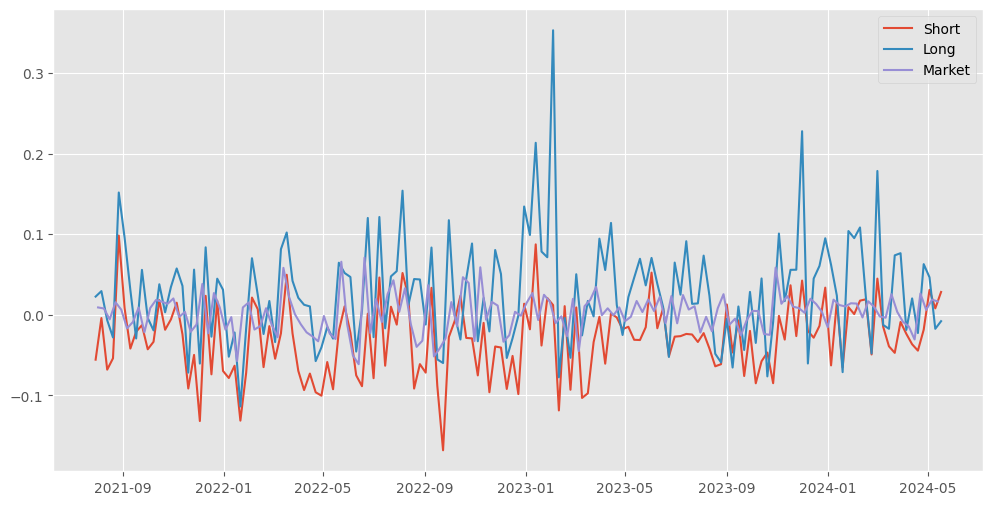

In [31]:
import matplotlib.pyplot as plt
plt.style.use(['ggplot'])

fig, ax = plt.subplots()
# Create a new figure with the desired size
fig.set_size_inches(12, 6)

Moving = 1

ax.plot(short_ret_df.date,short_ret_df.ret.rolling(Moving).mean())
ax.plot(long_ret_df.date,long_ret_df.ret.rolling(Moving).mean())
ax.plot(ret_mk_df.Date,ret_mk_df.ret.rolling(Moving).mean())

# The 'legend' function takes the labels as a list, so you need to provide them as a list
ax.legend(['Short', 'Long', "Market"])

plt.show()

In [32]:
import numpy as np
long_ret_1 = long_ret + 1
short_ret_1 = short_ret * -1 + 1
#short_ret_1 = short_ret + 1
long_ret_1 = long_ret_1.cumprod()
short_ret_1 = short_ret_1.cumprod()

short_ret_1 = pd.DataFrame(short_ret_1)
short_ret_1 = short_ret_1.reset_index()
short_ret_1['date'] = pd.to_datetime(short_ret_1['date'])

long_ret_1 = pd.DataFrame(long_ret_1)
long_ret_1 = long_ret_1.reset_index()
long_ret_1['date'] = pd.to_datetime(long_ret_1['date'])

ret_mk_1 = ret_mk + 1
ret_mk_1 = ret_mk_1.cumprod()
ret_mk_1 = ret_mk_1.dropna()

ret_mk_1 = pd.DataFrame(ret_mk_1)
ret_mk_1 = ret_mk_1.reset_index()
ret_mk_1 = ret_mk_1.rename(columns={"Adj Close": "ret"})

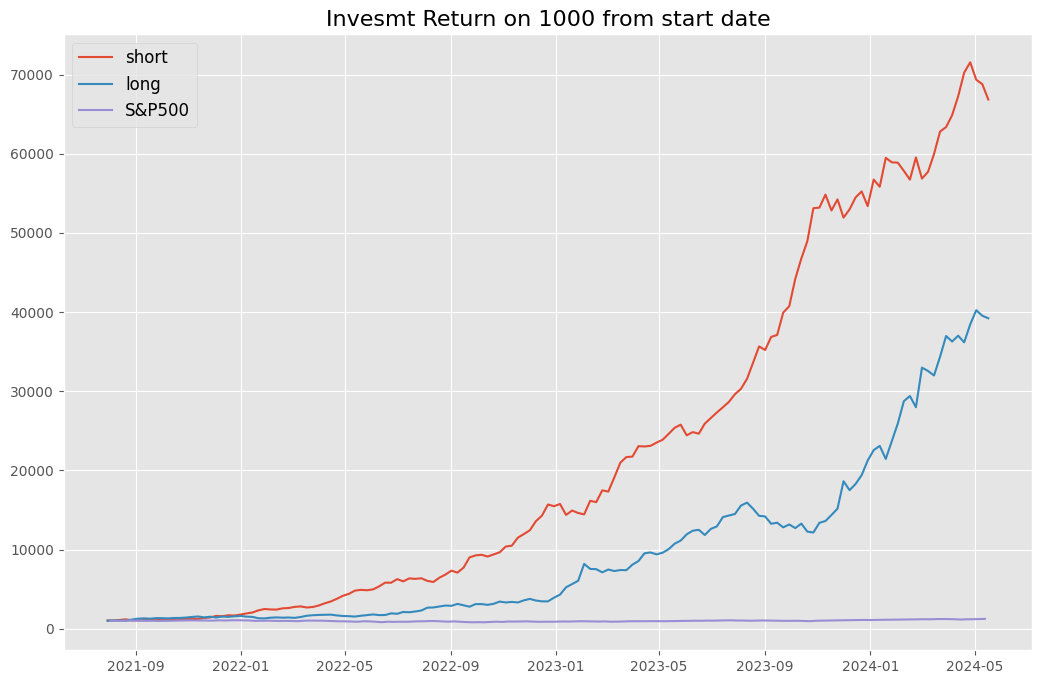

In [33]:
import matplotlib.pyplot as plt

plt.style.use(['ggplot'])

fig, ax = plt.subplots()
# Create a new figure with the desired size
fig.set_size_inches(12.5, 8)

ax.plot(short_ret_1.date, short_ret_1.ret*1000)
ax.plot(long_ret_1.date, long_ret_1.ret*1000)
ax.plot(ret_mk_1.Date,ret_mk_1.ret*1000)

# The 'legend' function takes the labels as a list, so you need to provide them as a list
ax.legend(['short', 'long', 'S&P500'], fontsize='large')
ax.set_title('Invesmt Return on 1000 from start date', fontsize=16)

plt.show()

# Evaluate returns

### Get weekly factors and risk-free rate

- There is some weekly data on French's website, but not everything we want is available weekly.
- So, we will get daily data and compound to weekly.

In [34]:
from pandas_datareader import DataReader as pdr

famafrench = pdr("F-F_Research_Data_5_Factors_2x3_daily", "famafrench", start=2010)[0] / 100
famafrench.index.name = "date"
famafrench = famafrench.reset_index()
famafrench["year"] = famafrench.date.apply(lambda x: x.isocalendar()[0])
famafrench["week"] = famafrench.date.apply(lambda x: x.isocalendar()[1])

ff = None
for col in ["Mkt-RF", "SMB", "HML", "CMA", "RMW", "RF"]:
    ser = famafrench.groupby(["year", "week"], group_keys=True)[col].apply(
        lambda x: (1+x).prod() - 1
    )
    ser.name = col
    ff = pd.concat((ff, ser), axis=1)
ff["date"] = famafrench.groupby(["year", "week"], group_keys=True).date.last()
ff = ff.reset_index(drop=True)
ff = ff.set_index("date")

<ipython-input-34-629e455ed9f0>:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  famafrench = pdr("F-F_Research_Data_5_Factors_2x3_daily", "famafrench", start=2010)[0] / 100


In [35]:
mom = pdr("F-F_Momentum_Factor_daily", "famafrench", start=2010)[0]/100
mom.index.name = "date"
mom.columns = ["UMD"]
mom = mom.reset_index()
mom["year"] = mom.date.apply(lambda x: x.isocalendar()[0])
mom["week"] = mom.date.apply(lambda x: x.isocalendar()[1])

umd = mom.groupby(["year", "week"], group_keys=True).UMD.apply(
    lambda x: (1+x).prod() - 1
)
umd = pd.DataFrame(umd)
umd["date"] = mom.groupby(["year", "week"], group_keys=True).date.last()
umd = umd.reset_index(drop=True)
umd = umd.set_index("date")

<ipython-input-35-43aae452051b>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  mom = pdr("F-F_Momentum_Factor_daily", "famafrench", start=2010)[0]/100


### Combine factors and long returns

In [36]:
long_ret.name = "ret"
long_ret.index = pd.to_datetime(long_ret.index)
data = pd.concat((ff, umd, long_ret), axis=1).dropna()
data.head(3)

,Mkt-RF,SMB,HML,CMA,RMW,RF,UMD,ret
date,,,,,,,,
2021-07-30,-0.004546,0.009760,0.020434,0.011785,0.005128,0.0,0.012218,0.022527
2021-08-06,0.010492,0.000477,0.006976,-0.012897,-0.005517,0.0,0.015559,0.029334
2021-08-13,0.005008,-0.014091,0.023291,0.009276,0.017238,0.0,0.002224,-0.006754


### Sharpe ratio

In [37]:
import numpy as np

sharpe = np.sqrt(52) * (data.ret - data.RF).mean() / data.ret.std()
print(f"annualized Sharpe ratio is {sharpe:.2%}")

annualized Sharpe ratio is 289.99%


### Market alpha and information ratio

In [38]:
import statsmodels.formula.api as smf

data["ret_rf"] = data.ret - data.RF
data["mkt_rf"] = data["Mkt-RF"]
result = smf.ols("ret_rf ~ mkt_rf", data).fit()

alpha = 52*result.params["Intercept"]
resid_stdev = np.sqrt(52 * result.mse_resid)
info_ratio = alpha / resid_stdev

print(f"annualized alpha is {alpha:.2%}")
print(f"annualized information ratio is {info_ratio:.2%}")

annualized alpha is 134.28%
annualized information ratio is 320.43%


In [39]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 ret_rf   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     47.27
Date:                Fri, 24 May 2024   Prob (F-statistic):           2.13e-10
Time:                        21:58:13   Log-Likelihood:                 195.00
No. Observations:                 136   AIC:                            -386.0
Df Residuals:                     134   BIC:                            -380.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0258      0.005      5.178      0.0

### Attribution analysis

In [40]:
result.params["Intercept"]

0.025822298495485417

In [41]:
alpha = 52*result.params["Intercept"]
print(alpha)

1.3427595217652417


In [42]:
result = smf.ols("ret_rf ~ mkt_rf + SMB + HML + CMA + RMW + UMD", data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 ret_rf   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     19.61
Date:                Fri, 24 May 2024   Prob (F-statistic):           3.59e-16
Time:                        21:58:13   Log-Likelihood:                 218.53
No. Observations:                 136   AIC:                            -423.1
Df Residuals:                     129   BIC:                            -402.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0302      0.004      6.984      0.0

### Combine factors and short returns

In [43]:
short_ret.name = "ret"
short_ret.index = pd.to_datetime(short_ret.index)
data = pd.concat((ff, umd, short_ret), axis=1).dropna()
data.head(3)

,Mkt-RF,SMB,HML,CMA,RMW,RF,UMD,ret
date,,,,,,,,
2021-07-30,-0.004546,0.009760,0.020434,0.011785,0.005128,0.0,0.012218,-0.055788
2021-08-06,0.010492,0.000477,0.006976,-0.012897,-0.005517,0.0,0.015559,-0.004094
2021-08-13,0.005008,-0.014091,0.023291,0.009276,0.017238,0.0,0.002224,-0.068154


### Sharpe ratio

In [44]:
import numpy as np

sharpe = np.sqrt(52) * (data.ret - data.RF).mean() / data.ret.std()
print(f"annualized Sharpe ratio is {sharpe:.2%}")

annualized Sharpe ratio is -499.03%


### Market alpha and information ratio

In [45]:
import statsmodels.formula.api as smf

data["ret_rf"] = data.ret - data.RF
data["mkt_rf"] = data["Mkt-RF"]
result = smf.ols("ret_rf ~ mkt_rf", data).fit()

alpha = 52*result.params["Intercept"]
resid_stdev = np.sqrt(52 * result.mse_resid)
info_ratio = alpha / resid_stdev

print(f"annualized alpha is {alpha:.2%}")
print(f"annualized information ratio is {info_ratio:.2%}")

annualized alpha is -170.17%
annualized information ratio is -686.02%


In [46]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 ret_rf   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     103.4
Date:                Fri, 24 May 2024   Prob (F-statistic):           2.35e-18
Time:                        21:58:13   Log-Likelihood:                 266.31
No. Observations:                 136   AIC:                            -528.6
Df Residuals:                     134   BIC:                            -522.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0327      0.003    -11.087      0.0

### Attribution analysis

In [47]:
result.params["Intercept"]

-0.03272577217432199

In [48]:
alpha = 52*result.params["Intercept"]
print(alpha)

-1.7017401530647434


In [49]:
result = smf.ols("ret_rf ~ mkt_rf + SMB + HML + CMA + RMW + UMD", data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 ret_rf   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     45.99
Date:                Fri, 24 May 2024   Prob (F-statistic):           9.30e-30
Time:                        21:58:13   Log-Likelihood:                 305.20
No. Observations:                 136   AIC:                            -596.4
Df Residuals:                     129   BIC:                            -576.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0296      0.002    -12.936      0.0